In [2]:
from basic_tools import *
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [4]:
h2_total=pd.read_csv(h2_total_par_filtered_path,index_col='phenotype')
h2_total.shape

(497, 7602)

# Parsing result of partitioned LDSC

In [5]:
suffix_bp_list_power="bp300 bp128 bp64 bp32 bp16 bp8".split()

In [6]:
regression_result_bp_list_dict=dict([make_regression_result_list(h2_total,phenotype,suffix_bp_list_power) for phenotype in phenotypes_par_filtered.index])

In [7]:
h2_bp8_df=pd.DataFrame([[phenotype]+(regression_result_list[-1]['h2']/regression_result_list[-1]['h2'].sum()).tolist() for phenotype,regression_result_list in regression_result_bp_list_dict.items()])
h2_bp8_df=h2_bp8_df.set_index(0)

In [8]:
h2_bp8_df.head()

,1,2,3,4,5,6,7,8,9,10,...,348,349,350,351,352,353,354,355,356,357
0,,,,,,,,,,,,,,,,,,,,,
50_irnt,0.002449,0.003530,0.006341,0.003803,0.003119,0.005330,0.002806,0.001878,0.001182,0.001539,...,0.000493,0.001100,0.003948,0.001863,0.000075,0.001995,0.001837,0.003213,0.003977,0.000378
20153_irnt,0.002717,0.004882,0.008197,0.003897,0.003294,0.005738,0.003477,0.001894,0.000268,0.001673,...,-0.000469,0.000969,0.003245,0.001532,0.000095,0.002434,0.002224,0.003044,0.002243,-0.000049
5097_irnt,0.005743,0.003308,0.007571,0.001724,0.008791,0.000951,0.004537,0.007151,0.001737,0.003011,...,-0.001116,0.002790,0.006154,0.016066,0.001683,0.005907,0.003468,0.003074,0.006154,0.000475
5098_irnt,0.005180,0.003838,0.006167,0.000450,0.010550,0.001213,0.004322,0.006354,0.002496,0.003112,...,-0.001738,0.001816,0.005357,0.016397,0.001574,0.005027,0.003948,0.002949,0.008087,0.000925
5099_irnt,0.005446,0.003488,0.006414,0.001265,0.011976,0.001439,0.002936,0.005372,0.002848,0.003531,...,-0.001454,0.002321,0.004509,0.015210,0.001451,0.003805,0.003933,0.002480,0.006563,0.000443


# Clustering

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [9]:
pca_data=h2_bp8_df

pca = PCA(n_components=50)
pca_result=pca.fit_transform(pca_data)
pca_result = pd.DataFrame(pca_result,index=pca_data.index)

In [10]:
tsne_data=pca_result

tsne = TSNE(learning_rate=100,perplexity=4)
#tsne = TSNE(learning_rate=200)
tsne_result = pd.DataFrame(tsne.fit_transform(tsne_data),index=tsne_data.index)

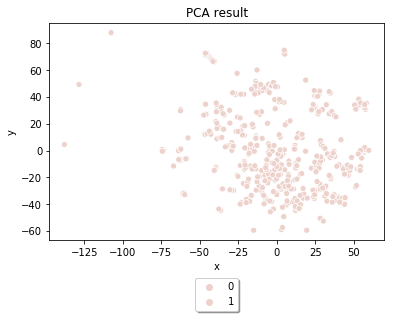

In [11]:
plot_data=tsne_result
x_data=plot_data[0]
y_data=plot_data[1]

#hue_data=[h2_total.loc[pheno_code]['uni.Total Liability scale h2'] for  pheno_code in pheno_code_list]
#hue_data=[corr_with_dummy_cm_dict['snp'].loc[pheno_code]['cm8'] for  pheno_code in toplot.index]
hue_data=1

plt.title("PCA result")
sns.scatterplot(x_data,y_data,hue=hue_data)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)


plt.show()

In [12]:
dbscan=DBSCAN(eps=3, min_samples=2)
dbscan_result=dbscan.fit(tsne_result)

In [13]:
plot_data=tsne_result.copy()
plot_data.columns=['x_data','y_data']
plot_data['label']=dbscan_result.labels_

In [14]:
description_dict_merge=pd.read_csv(description_dict_merge_path,sep='\t',index_col='description')

def description_to_short(desc,mode='pub',suffix="basic"):

    description_dict=description_dict_merge
    
    if not mode in ['ori','pub','abbr','abbr_pub','abbr_pub_ori']:
        raise    
    if desc in description_dict.index:
        if mode=='ori':
            return desc
        elif mode=='pub':
            #print(correlation_description_dict['description_pub'].loc['Tobacco smoking: Ex-smoker'],description_dict['description_pub'].loc['Tobacco smoking: Ex-smoker'])
            return description_dict['description_pub'+"_"+suffix].loc[desc]
        elif mode=='abbr':
            return description_dict['description_abbr'+"_"+suffix].loc[desc]
        elif mode=='abbr_pub':
            abbr=description_to_short(desc,mode='abbr',suffix=suffix)
            #print(description_to_short(desc,mode='pub',suffix=suffix))
            return description_to_short(desc,mode='pub',suffix=suffix) if type(abbr)==float or abbr=='' else abbr
        elif mode=='abbr_pub_ori':
            abbr_pub=description_to_short(desc,mode='abbr_pub',suffix=suffix)
            #print(abbr_pub)
            return desc if type(abbr_pub)==float or abbr_pub=='' else abbr_pub
    else:
        return np.nan


In [15]:
for idx in plot_data_filtered.index:
    print(idx,code_to_description(idx))
    
    print(description_to_short(code_to_description(idx),'abbr_pub',"basic"))

NameError: name 'plot_data_filtered' is not defined

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


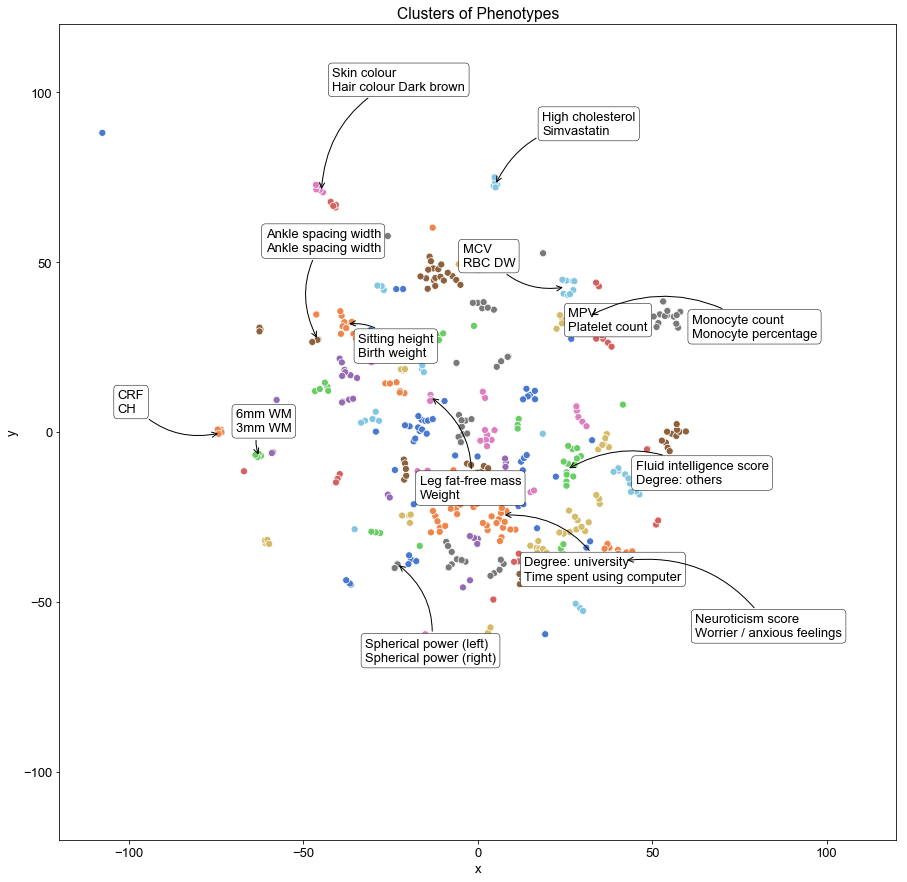

In [63]:
plt.rcParams['font.family']='Arial'

plt.rcParams["figure.figsize"] = (15,15)

x_data=plot_data['x_data']
y_data=plot_data['y_data']
hue_data=plot_data['label']

#group_list=plot_data['label']
#group_list=group_list.groupby(group_list).groups
#group_count=pd.Series(0,index=group_list.keys())

plt.title("Clusters of Phenotypes")
sns.scatterplot(x_data,y_data,hue=hue_data,legend=None,s=50,palette=sns.color_palette("muted",n_colors=len(np.unique(hue_data))))

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(10,40,10)
theta_sample=2*np.pi*np.arange(0,1,1/30)
#theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]

text_plotted=pd.DataFrame([])

for label in plot_data['label'].unique():
    plot_data_filtered=plot_data[plot_data['label']==label]
    plot_data_filtered['description_short']=plot_data_filtered.index.map(code_to_description).map(lambda x: description_to_short(x,'abbr_pub',"basic"))
    #print(index_shorten[~index_shorten.isnull()])
    plot_data_filtered=plot_data_filtered[~plot_data_filtered['description_short'].isnull()].iloc[:2]
    if plot_data_filtered.shape[0]<2:
        continue
    s=plot_data_filtered['description_short'].values
    s='\n'.join(s)
    xy=np.array([plot_data_filtered['x_data'].mean(), plot_data_filtered['y_data'].mean()])
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    #print(xy)
    
    for move in move_sample:
        xytext=xy+move
        if text_plotted.shape[0]==0 or (((text_plotted['x']-xytext[0])**2+0.4*(text_plotted['y']-xytext[1])**2)<1000).sum()==0:
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,1), ec="black", lw=0.5))
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            break


plt.xlabel("x")
plt.ylabel("y")
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True,ncol=5)

plt.xlim(-120,120)
plt.ylim(-120,120)


plt.show()

In [ ]:
#plot_data_filtered.index.map(code_to_description).map(lambda x: description_to_short(x,'abbr_pub',"basic"))

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


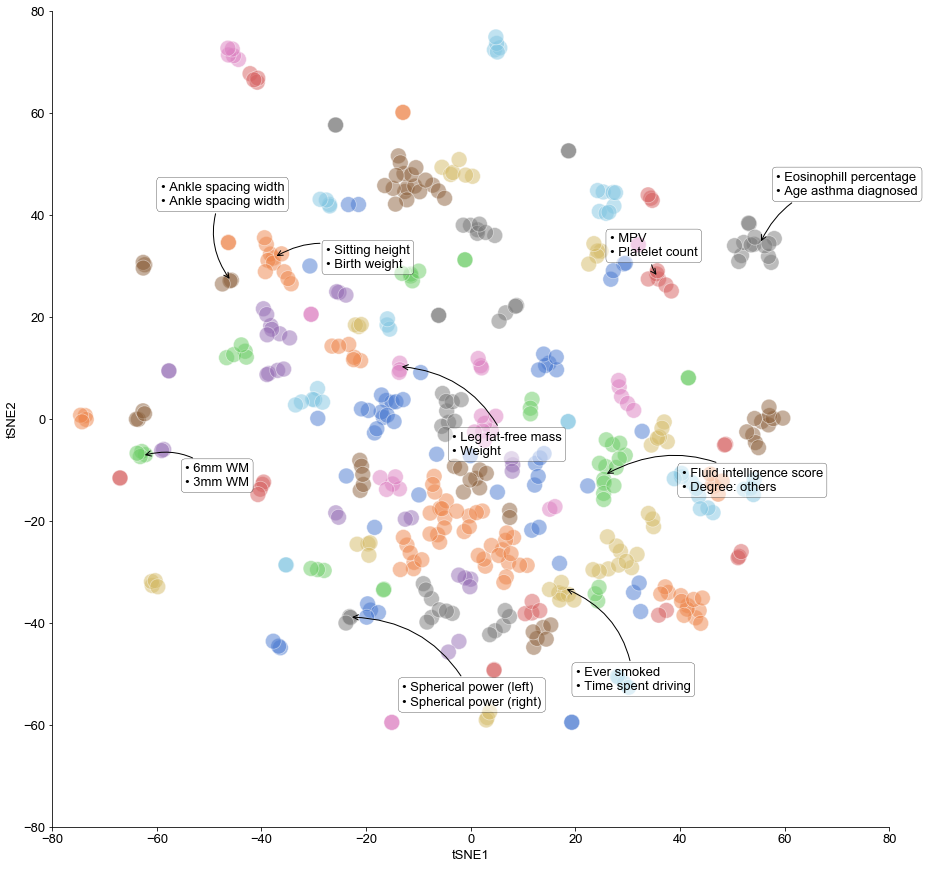

In [75]:
plt.rcParams['font.family']='Arial'

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams['font.size']=13

x_data=plot_data['x_data']
y_data=plot_data['y_data']
hue_data=plot_data['label']

#group_list=plot_data['label']
#group_list=group_list.groupby(group_list).groups
#group_count=pd.Series(0,index=group_list.keys())


sns.scatterplot(x_data,y_data,hue=hue_data,legend=None,s=250,palette=sns.color_palette("muted",n_colors=len(np.unique(hue_data))),
                alpha=0.5
               )

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(10,25,5)
theta_sample=2*np.pi*np.arange(0,1,1/30)
#theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]

text_plotted=pd.DataFrame([])

for label in plot_data['label'].unique():
    plot_data_filtered=plot_data[plot_data['label']==label]
    plot_data_filtered['description_short']=plot_data_filtered.index.map(code_to_description).map(lambda x: description_to_short(x,'abbr_pub',"basic"))
    #print(index_shorten[~index_shorten.isnull()])
    plot_data_filtered=plot_data_filtered[~plot_data_filtered['description_short'].isnull()].iloc[:2]
    if plot_data_filtered.shape[0]<2:
        continue
    s=plot_data_filtered['description_short'].values
    s=['• '+i for i in s]
    s='\n'.join(s)
    xy=np.array([plot_data_filtered['x_data'].mean(), plot_data_filtered['y_data'].mean()])
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    #print(xy)
    
    for move in move_sample:
        xytext=xy+move
        
        if abs(xytext[0])>60 or abs(xytext[1])>60:
            continue
        
        if text_plotted.shape[0]==0 or (((text_plotted['x']-xytext[0])**2+0.4*(text_plotted['y']-xytext[1])**2)<1000).sum()==0:
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.5), ec="black", lw=0.3))
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            break

#plt.xticks([])
#plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(False)
#plt.gca().axes.get_yaxis().set_visible(False)

plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
#plt.
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True,ncol=5)
plt.title("")
plt.xlim(-80,80)
plt.ylim(-80,80)
sns.despine()

plt.show()


# Save data

In [84]:
plot_data['description']=plot_data.index.map(code_to_description)

In [94]:
tosave=plot_data[['description','label']]
tosave[tosave['label']!=-1].sort_values('label').to_csv('pca_result.csv')

# Network

In [ ]:
pca_data=h2_bp8_df

pca = PCA(n_components=2)
pca_result=pca.fit_transform(pca_data)
pca_result = pd.DataFrame(pca_result,index=pca_data.index)

In [ ]:
pca_result.head()

In [ ]:
dbscan=DBSCAN(eps=0.01, min_samples=3)
dbscan_result=dbscan.fit(pca_result)

In [ ]:
dbscan_result.labels_

In [ ]:
tsne_data=pca_result

tsne = TSNE(learning_rate=100,perplexity=4)
#tsne = TSNE(learning_rate=200)
tsne_result = pd.DataFrame(tsne.fit_transform(tsne_data),index=tsne_data.index)

In [ ]:
plot_data=tsne_result.copy()
plot_data.columns=['x_data','y_data']
plot_data['label']=dbscan_result.labels_

In [ ]:
plt.rcParams['font.family']=['sans-serif']
plt.rcParams['font.sans-serif']=['Helvetica']
plt.rcParams['font.sans-serif']  

plt.rcParams["figure.figsize"] = (15,15)

x_data=plot_data['x_data']
y_data=plot_data['y_data']
hue_data=plot_data['label']

#group_list=plot_data['label']
#group_list=group_list.groupby(group_list).groups
#group_count=pd.Series(0,index=group_list.keys())

plt.title("Clusters of Phenotypes")
sns.scatterplot(x_data,y_data,hue=hue_data,legend=None,s=50,palette=sns.color_palette("muted",n_colors=len(np.unique(hue_data))))

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(10,50,10)
theta_sample=2*np.pi*np.arange(0,1,1/30)


text_plotted=pd.DataFrame([])

for label in plot_data['label'].unique():
    plot_data_filtered=plot_data[plot_data['label']==label]
    plot_data_filtered['description_short']=plot_data_filtered.index.map(code_to_description).map(lambda x: description_to_short(x,'abbr_pub'))
    #print(index_shorten[~index_shorten.isnull()])
    plot_data_filtered=plot_data_filtered[~plot_data_filtered['description_short'].isnull()].iloc[:2]
    if plot_data_filtered.shape[0]<2:
        continue
    s=plot_data_filtered['description_short'].values
    s='\n'.join(s)
    xy=np.array([plot_data_filtered['x_data'].mean(), plot_data_filtered['y_data'].mean()])
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    #print(xy)
    
    for move in move_sample:
        xytext=xy+move
        if text_plotted.shape[0]==0 or (((text_plotted['x']-xytext[0])**2+0.4*(text_plotted['y']-xytext[1])**2)<1000).sum()==0:
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,1), ec="black", lw=0.5))
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            break


plt.xlabel("x")
plt.ylabel("y")
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True,ncol=5)

plt.xlim(-120,120)
plt.ylim(-120,120)


plt.show()

# test

In [9]:
pca_data=h2_bp8_df

pca = PCA(n_components=50)
pca_result=pca.fit_transform(pca_data)
pca_result = pd.DataFrame(pca_result,index=pca_data.index)

In [10]:
tsne_data=pca_result

tsne = TSNE(learning_rate=100,perplexity=4)
#tsne = TSNE(learning_rate=200)
tsne_result = pd.DataFrame(tsne.fit_transform(tsne_data),index=tsne_data.index)

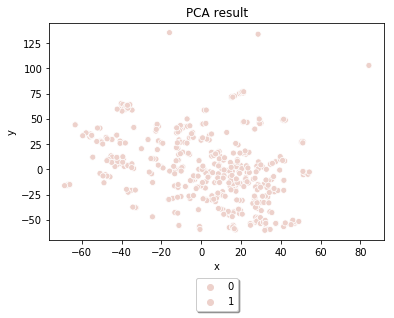

In [11]:
plot_data=tsne_result
x_data=plot_data[0]
y_data=plot_data[1]

#hue_data=[h2_total.loc[pheno_code]['uni.Total Liability scale h2'] for  pheno_code in pheno_code_list]
#hue_data=[corr_with_dummy_cm_dict['snp'].loc[pheno_code]['cm8'] for  pheno_code in toplot.index]
hue_data=1

plt.title("PCA result")
sns.scatterplot(x_data,y_data,hue=hue_data)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)


plt.show()

In [12]:
dbscan=DBSCAN(eps=3, min_samples=2)
dbscan_result=dbscan.fit(tsne_result)

In [13]:
plot_data=tsne_result.copy()
plot_data.columns=['x_data','y_data']
plot_data['label']=dbscan_result.labels_

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


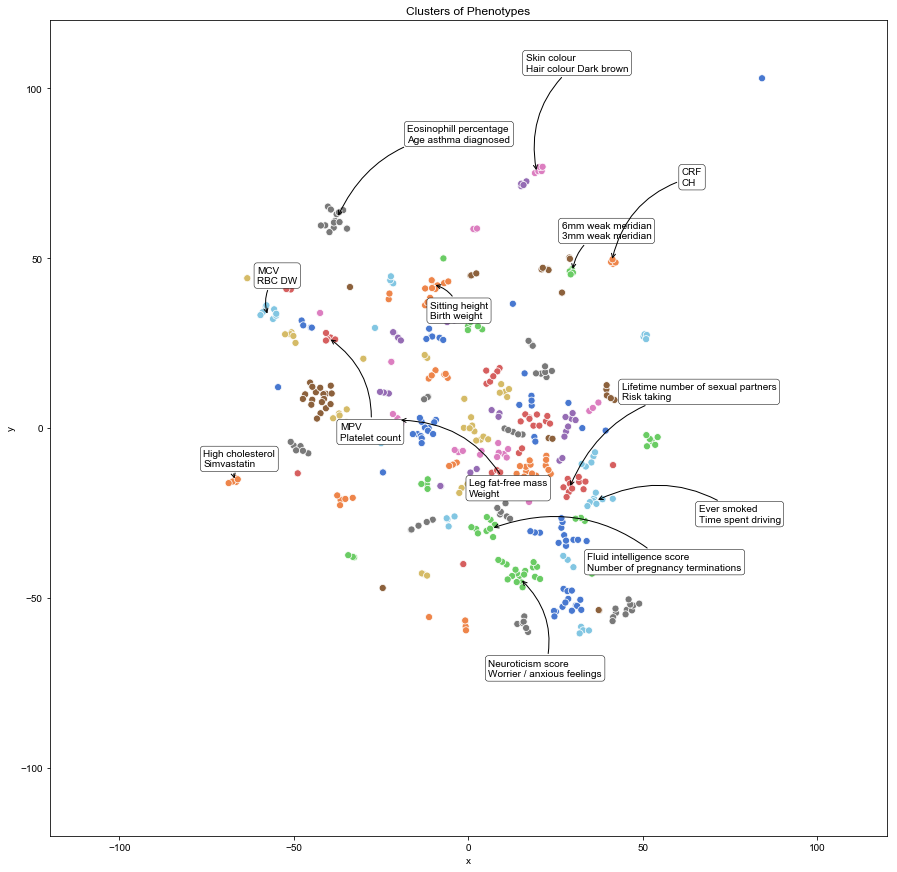

In [14]:
plt.rcParams['font.family']='Arial'

plt.rcParams["figure.figsize"] = (15,15)

x_data=plot_data['x_data']
y_data=plot_data['y_data']
hue_data=plot_data['label']

#group_list=plot_data['label']
#group_list=group_list.groupby(group_list).groups
#group_count=pd.Series(0,index=group_list.keys())

plt.title("Clusters of Phenotypes")
sns.scatterplot(x_data,y_data,hue=hue_data,legend=None,s=50,palette=sns.color_palette("muted",n_colors=len(np.unique(hue_data))))

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(10,40,10)
theta_sample=2*np.pi*np.arange(0,1,1/30)
#theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]

text_plotted=pd.DataFrame([])

for label in plot_data['label'].unique():
    plot_data_filtered=plot_data[plot_data['label']==label]
    plot_data_filtered['description_short']=plot_data_filtered.index.map(code_to_description).map(lambda x: description_to_short(x,'abbr_pub'))
    #print(index_shorten[~index_shorten.isnull()])
    plot_data_filtered=plot_data_filtered[~plot_data_filtered['description_short'].isnull()].iloc[:2]
    if plot_data_filtered.shape[0]<2:
        continue
    s=plot_data_filtered['description_short'].values
    s='\n'.join(s)
    xy=np.array([plot_data_filtered['x_data'].mean(), plot_data_filtered['y_data'].mean()])
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    #print(xy)
    
    for move in move_sample:
        xytext=xy+move
        if text_plotted.shape[0]==0 or (((text_plotted['x']-xytext[0])**2+0.4*(text_plotted['y']-xytext[1])**2)<1000).sum()==0:
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,1), ec="black", lw=0.5))
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            break


plt.xlabel("x")
plt.ylabel("y")
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True,ncol=5)

plt.xlim(-120,120)
plt.ylim(-120,120)


plt.show()